# Finance Project

This python project analyzes stock data of Bank of America, Citigroup, Goldman Sachs, JP Morgan Chase, Morgan Stanley, and Wells Fargo from January 3, 2006 to March 27, 2018. I used <a href='https://blog.quandl.com/api-for-stock-data'>Quandl’s API for Stock Data</a> in this project.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(year=2006,month=1,day=1)
end = datetime.datetime(year=2020,month=1,day=1)

In [4]:
BAC = data.DataReader("BAC", 'quandl', start, end, api_key=my_key)
C = data.DataReader("C", 'quandl', start, end, api_key=my_key)
GS = data.DataReader("GS", 'quandl', start, end, api_key=my_key)
JPM = data.DataReader("JPM", 'quandl', start, end, api_key=my_key)
MS = data.DataReader("MS", 'quandl', start, end, api_key=my_key)
WFC = data.DataReader("WFC", 'quandl', start, end, api_key=my_key)

## Note:
> My API key is redacted.

In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.sort_index(inplace=True)

In [9]:
bank_stocks.head()

Bank Ticker    BAC                                                         \
Stock Info    Open   High    Low  Close      Volume ExDividend SplitRatio   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700.0        0.0        1.0   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0        0.0        1.0   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0        0.0        1.0   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0        0.0        1.0   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0        0.0        1.0   

Bank Ticker                                   ...    WFC                    \
Stock Info     AdjOpen    AdjHigh     AdjLow  ...    Low  Close     Volume   
Date                                          ...                            
2006-01-03   37.126108  37.331837  36.516835  ...  62.39  63.80  5508200.0   
2006-01-04   37.189409  37.379312  36.754214  ...  62.73  63.06  5435000.0   
2006-01-05   36.857078  37.054894  36.651349  ...  62.62  62.99  5079000.0   
2006-01-06   37.031156  37.118195  36.675087  ...  62.77  63.36  4201900.0   
2006-01-09   36.967855  37.165671  36.683000  ...  63.11  63.35  2809800.0   

Bank Ticker                                                                    \
Stock Info  ExDividend SplitRatio    AdjOpen    AdjHigh     AdjLow   AdjClose   
Date                                                                            
2006-01-03         0.0        1.0  22.799832  23.070400  22.507619  23.016287   
2006-01-04         0.0        1.0  22.944135  22.958566  22.630277  22.749327   
2006-01-05         0.0        1.0  22.727681  22.767364  22.590594  22.724074   
2006-01-06         0.0        1.0  22.785402  22.926097  22.644707  22.857554   
2006-01-09         0.0        1.0  22.853946  22.962173  22.767364  22.853946   

Bank Ticker              
Stock Info    AdjVolume  
Date                     
2006-01-03   11016400.0  
2006-01-04   10870000.0  
2006-01-05   10158000.0  
2006-01-06    8403800.0  
2006-01-09    5619600.0  

[5 rows x 72 columns]

In [10]:
bank_stocks.tail()

Bank Ticker    BAC                                                           \
Stock Info    Open    High    Low  Close       Volume ExDividend SplitRatio   
Date                                                                          
2018-03-21   32.00  32.450  31.68  31.87   64135559.0        0.0        1.0   
2018-03-22   31.44  31.490  30.42  30.55  109386636.0        0.0        1.0   
2018-03-23   30.69  30.820  29.05  29.17  114544472.0        0.0        1.0   
2018-03-26   29.89  30.555  29.65  30.44   81989080.0        0.0        1.0   
2018-03-27   30.65  30.670  29.21  29.52   85188716.0        0.0        1.0   

Bank Ticker                         ...     WFC                                \
Stock Info  AdjOpen AdjHigh AdjLow  ...     Low  Close      Volume ExDividend   
Date                                ...                                         
2018-03-21    32.00  32.450  31.68  ...  54.540  54.79  17476061.0        0.0   
2018-03-22    31.44  31.490  30.42  ...  52.175  52.53  31792203.0        0.0   
2018-03-23    30.69  30.820  29.05  ...  50.940  50.98  30391839.0        0.0   
2018-03-26    29.89  30.555  29.65  ...  51.520  52.29  26334835.0        0.0   
2018-03-27    30.65  30.670  29.21  ...  50.690  51.10  22027158.0        0.0   

Bank Ticker                                                          
Stock Info  SplitRatio AdjOpen AdjHigh  AdjLow AdjClose   AdjVolume  
Date                                                                 
2018-03-21         1.0   55.02   55.58  54.540    54.79  17476061.0  
2018-03-22         1.0   54.21   54.28  52.175    52.53  31792203.0  
2018-03-23         1.0   52.72   52.94  50.940    50.98  30391839.0  
2018-03-26         1.0   51.95   52.55  51.520    52.29  26334835.0  
2018-03-27         1.0   52.40   52.80  50.690    51.10  22027158.0  

[5 rows x 72 columns]

## Note:
>The dates range from January 3, 2006 to March 27, 2018.

The following are the maximum closing prices for each bank.

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       80.08
GS     273.38
JPM    118.77
MS      89.30
WFC     73.00
dtype: float64

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

Adding data to a new data frame called returns. This loop calculates the percent change in closing prices from the previous day using the bank_stocks data frame. These values are inputs into the returns data frame.

The inputs for the first row are all null because we do not have the previous day's closing prices for that date.

In [14]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [15]:
returns.tail()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2018-03-21,-0.003440,0.005485,-0.005091,0.000872,-0.006264,-0.002004
2018-03-22,-0.041418,-0.041053,-0.035326,-0.041747,-0.043250,-0.041248
2018-03-23,-0.045172,-0.034277,-0.029058,-0.026739,-0.047035,-0.029507
2018-03-26,0.043538,0.027688,0.039224,0.030838,0.042827,0.025696
2018-03-27,-0.030223,-0.021496,-0.029896,-0.019400,-0.021179,-0.022758


### In the following pair plot, we can see that the returns of each bank are generally directly proportional to the other banks in some fashion, except for Citigroup. The returns for Citigroup are very slow growing.

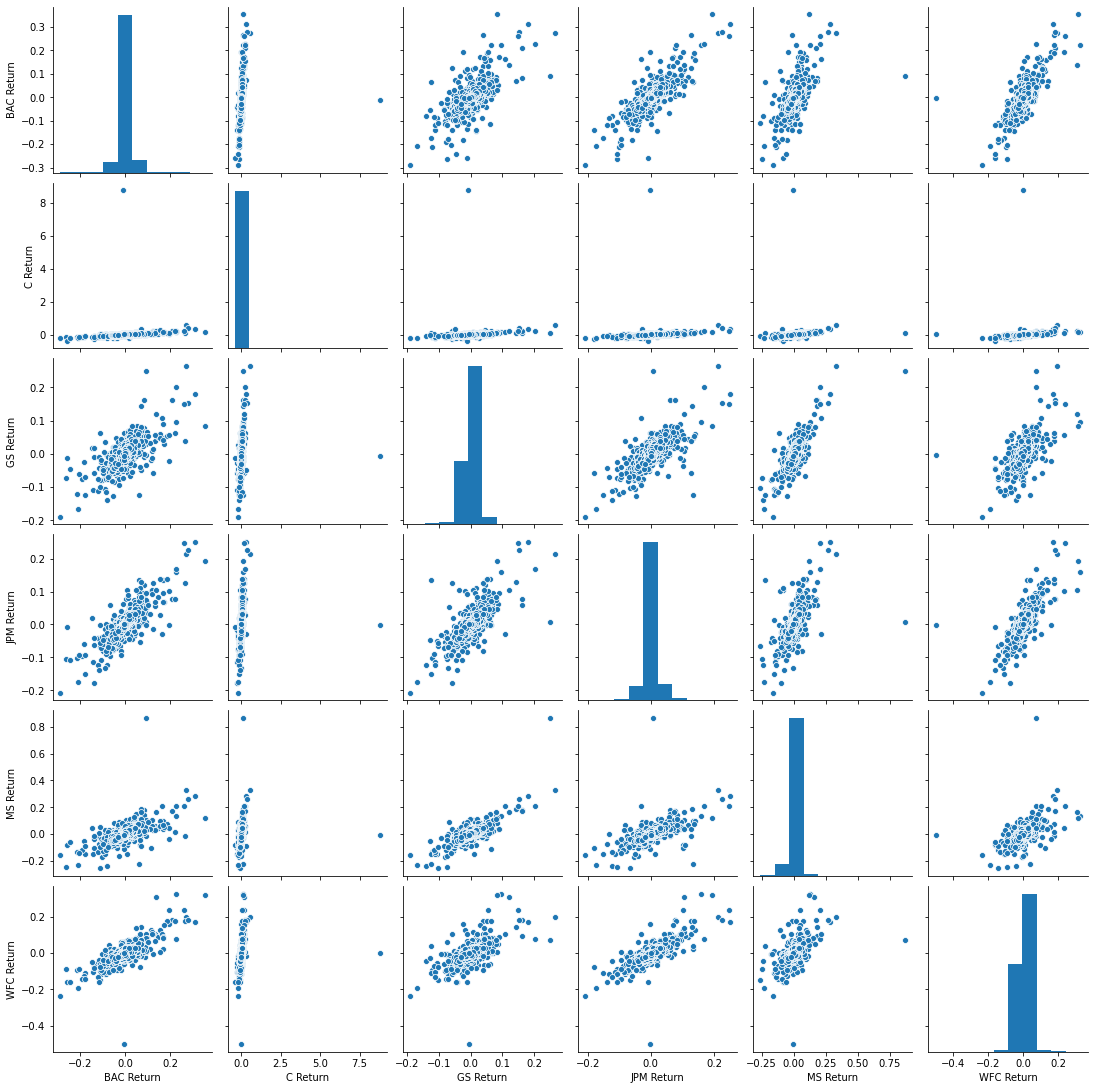

In [16]:
sns.pairplot(data=returns[1:])

### These are the days with the lowest returns for each bank.

Bank of America, Goldman Sachs, and JP Morgan Chase, interestingly, bottomed out on <a href='https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj9lpmn9ofrAhUEL6wKHc4uDEsQFjAZegQIEBAB&url=https%3A%2F%2Fwww.nytimes.com%2F2009%2F01%2F21%2Fus%2Fpolitics%2F20web-inaug2.html&usg=AOvVaw1gSN99VNf6bLqZX0weRUrO'>President Obama's Inauguration Day</a>.

Citigroup had its lowest day on February 27, 2009 when <a href='https://money.cnn.com/2009/02/27/news/citi.confidence.fortune/index.htm?postversion=2009022713'>its preferred shares were converted to common stock</a>.

Morgan Stanley's lowest return day corresponded to <a href='https://money.cnn.com/2008/10/09/news/companies/banks/index.htm'>an end to bans on short selling stocks</a>.

Wells Fargo's lowest return day corresponds to its last stock split, where there was a 2 for 1 stock split for shareholders.

In [17]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

### The following are the dates of each bank's highest returns.

In [18]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

### The following are the variance/standard deviations on each bank's returns.

Citigroup has a higher-than-average standard deviation and could indicate a riskier investment in that regard.

In [19]:
returns.std()

BAC Return    0.033930
C Return      0.162066
GS Return     0.023839
JPM Return    0.025657
MS Return     0.035006
WFC Return    0.029398
dtype: float64

### These are the standard deviations for each bank for the year of 2017.

2017 is the last full year of data in our set. The standard deviations are fairly consistent with one another during this year. We can take a closer look at the two that have the highest standard deviations: Bank of America and Morgan Stanley.

In [20]:
ret_2017 = returns.loc['2017-01-01':'2017-12-31']
ret_2017.std()

BAC Return    0.013580
C Return      0.011148
GS Return     0.012444
JPM Return    0.010196
MS Return     0.013217
WFC Return    0.011223
dtype: float64

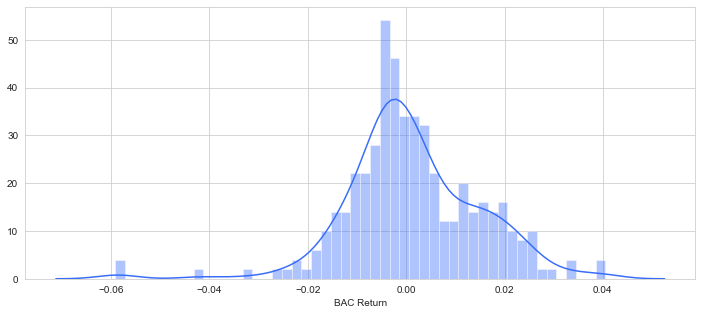

In [21]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.set_palette('rainbow')
sns.distplot(ret_2017['BAC Return'],bins=50)

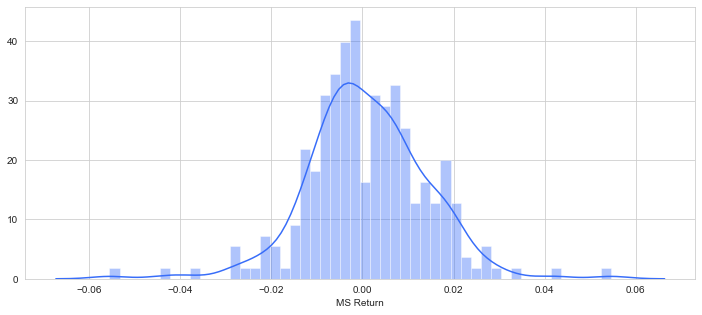

In [22]:
plt.figure(figsize=(12,5))
sns.distplot(ret_2017['MS Return'],bins=50)

The distributions of both Bank of America and Morgan Stanley are similar. The outliers of both are also similarly arranged, but Bank of America has one fewer apparent outlier than Morgan Stanley. This may have some effect on the standard deviations, but a majority of Morgan Stanley's returns stay between -0.02 and +0.02, where Bank of America's returns are mostly between -0.02 and +0.03.

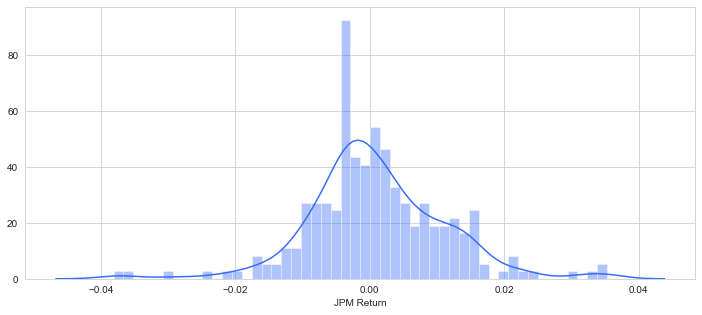

In [23]:
plt.figure(figsize=(12,5))
sns.distplot(ret_2017['JPM Return'],bins=50)

### Comparing the distributions of Bank of America and Morgan Stanley to JP Morgan Chase's distribution.

JP Morgan's distribution is in a more compact range and are generally more consistent than Bank of America or Morgan Stanley.

In [24]:
import plotly
import cufflinks as cf
cf.go_offline()

### These are the closing prices for each bank's stocks over the specified time period.

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### This is Goldman Sachs's closing prices and their 30 day averages over the year of 2017.

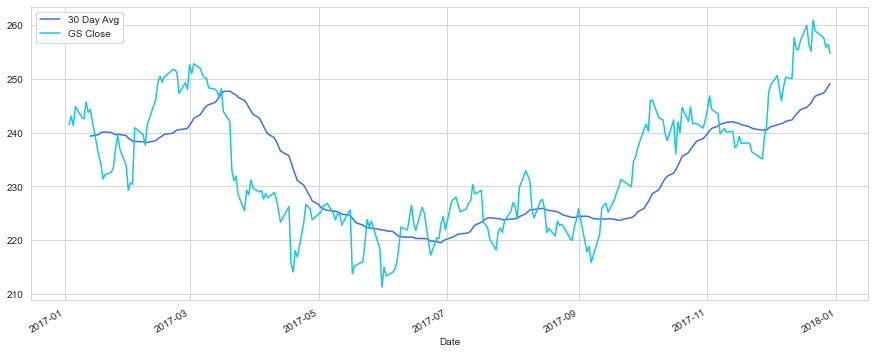

In [26]:
plt.figure(figsize=(15,6))
bank_stocks['GS']['Close'].loc['2016-12-01':'2018-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['GS']['Close'].loc['2017-01-01':'2018-01-01'].plot(label='GS Close')
plt.legend()

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

### The following figures show whether there are any correlations between banks and their stock closing price trends.

JP Morgan Chase and Bank of America seem to have the least correlation during this time period; Bank of America and Morgan Stanley seem to have the most correlation.

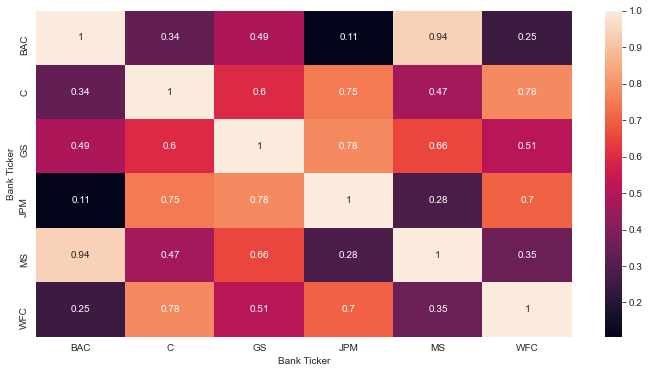

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(close_corr,annot=True)

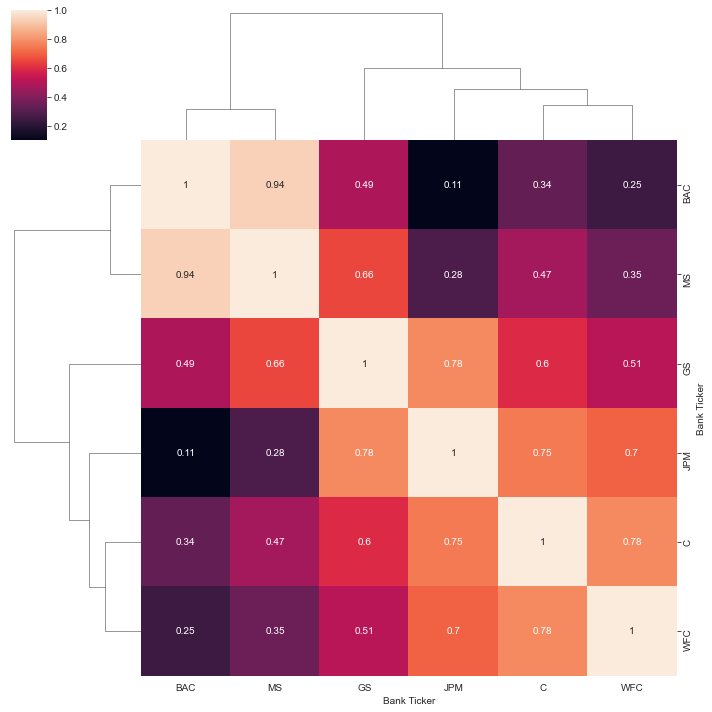

In [29]:
sns.clustermap(close_corr,annot=True)

In [30]:
close_corr.iplot(kind='heatmap',colorscale='ylgnbu')

In [31]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

### The following is a better visualization of the daily status of stocks for Goldman Sach in 2017.

The green bars indicate a share price gain and the red bars indicate a share price declines.

In [32]:
gs17 = bank_stocks['GS'][['Open','High','Low','Close']].loc['2017-01-01':'2018-01-01']
gs17.iplot(kind='candlestick')

### The following is a plot of Goldman Sachs's closing prices and simple moving averages for 13, 21, and 55 day periods.

In [33]:
gs17 = bank_stocks['GS']['Close'].loc['2017-01-01':'2018-01-01']
gs17.ta_plot(study='sma',periods=[13,21,55])

### The following is a Bollinger band plot of closing prices for Goldman Sachs in 2017 with a 14-day simple moving average period.

In [34]:
bank_stocks['GS']['Close'].loc['2017-01-01':'2018-01-01'].ta_plot(study='boll')